In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
%matplotlib inline

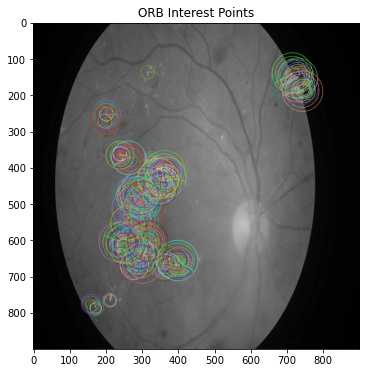

In [2]:
dataset_path = r'basee_dir/train_dir/drd'
img_building = cv2.imread(os.path.join(dataset_path, 'IDRiD_001.jpg'))
img_building = cv2.cvtColor(img_building, cv2.COLOR_BGR2GRAY)  # Convert from cv's BRG default color order to RGB
img_building = cv2.resize(img_building, (900,900))
orb = cv2.ORB_create()
key_points, description = orb.detectAndCompute(img_building, None)
img_building_keypoints = cv2.drawKeypoints(img_building, 
                                           key_points, 
                                           img_building, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.


plt.figure(figsize=(6, 6))
plt.title('ORB Interest Points')
plt.imshow(img_building_keypoints); plt.show()

In [3]:
dir = r"basee_dir/train_dir"
orb = cv2.ORB_create(nfeatures = 10)
categories = ["drd" , "no_drd" ]
data=[]
images= []

In [4]:
for category in categories:
    path= os.path.join(dir,category)
    label= categories.index(category)
    
    
    for img in os.listdir(path):
        
        imgpath = os.path.join(path, img)
        
        
        drd_image = cv2.imread(imgpath,0)
        images.append(drd_image)
      
        try:
            
            drd_image = cv2.resize(drd_image, (96,96))
            image = np.array( drd_image).flatten()
        
            
            #kp,des = orb.detectAndCompute(img ,None)
            #descriptor = np.array( kp).flatten()
        
    
            data.append([image,label])
        
        except Exception as e:
            pass
    
       
print(len(data))

371


In [5]:
desList=[]
for category in categories:
    path= os.path.join(dir,category)
    #label= categories.index(category)
    
    
    for img in os.listdir(path):
        
        imgpath = os.path.join(path, img)
        
        
        drd_image = cv2.imread(imgpath,0)
        kp,des = orb.detectAndCompute(drd_image,None)
#         images.append(drd_image)
      
        try:
            
            des = cv2.resize(des, (96,96))
            im = np.array( des).flatten()
        
            
            #kp,des = orb.detectAndCompute(img ,None)
            #descriptor = np.array( kp).flatten()
        
    
            desList.append(im)
        
        except Exception as e:
            pass
    
       
print(len(desList))

370


In [27]:
# # #desList= cv2.resize(desList,(128,128))
d= desList[0:370]
print(len(d))

370


In [34]:
import random
random.shuffle(data)
features= []
labels= []

In [35]:
for feature,label in data:
    features.append(feature)
    labels.append(label)
labels= labels[0:370]

In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split (d, labels , test_size= 0.20)

In [37]:
from sklearn import svm
from sklearn.svm import SVC
model = SVC( C=1, kernel = 'linear', gamma= 'auto')

In [38]:
model.fit(xtrain, ytrain)

SVC(C=1, gamma='auto', kernel='linear')

 Accuracy : 68.91891891891892
Prediction is : drd


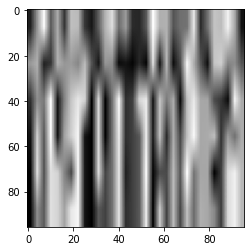

In [39]:
from sklearn.metrics import accuracy_score

prediction = model.predict(xtest)

#print("Accuracy: "+str(accuracy_score(xtest, ytest)))

accuracy = model.score(xtest, ytest)

categories = ["drd" , "no_drd" ]

print(" Accuracy :" , accuracy*100)

print("Prediction is :", categories[prediction[0]])
drd= xtest[0].reshape(96,96)

plt.imshow(drd, cmap='gray')
plt.show()

In [121]:
from sklearn.ensemble import RandomForestClassifier
# Initializing and fitting data to the random forest classifier
RandForest_K_best = RandomForestClassifier()      
RandForest_K_best = RandForest_K_best.fit(xtrain, ytrain)

 Accuracy : 72.97297297297297
Prediction is : drd


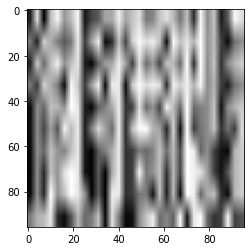

In [122]:
# Making a prediction and calculting the accuracy
y_pred = RandForest_K_best.predict(xtest)



#print("Accuracy: "+str(accuracy_score(xtest, ytest)))

accuracy = RandForest_K_best.score(xtest, ytest)

categories = ["drd" , "no_drd" ]

print(" Accuracy :" , accuracy*100)

print("Prediction is :", categories[y_pred[0]])
drd= xtest[0].reshape(96,96)

plt.imshow(drd, cmap='gray')
plt.show()